Configure notebook...

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Imports

In [4]:
from pathlib import Path
import pandas as pd
from IPython.display import IFrame, HTML, Markdown, Image, display

Define benchmark

In [5]:
OUT_DIR_BASE = "out"
BENCH = "coremark"
DATE = "latest"

Lookup directories

In [49]:
BENCH_DIR = Path(OUT_DIR_BASE) / BENCH
assert BENCH_DIR.is_dir()
if DATE == "latest":
    dates = [f for f in BENCH_DIR.iterdir() if f.is_dir()]
    assert len(dates) > 0
    if len(dates) == 1:
        DATE = dates[0].name
    else:
        raise NotImplementedError("date lookup")
DATE_DIR = BENCH_DIR / DATE
assert DATE_DIR.is_dir()

print(f"Picked date: {DATE}")
print(f"Directory: {DATE_DIR}")

RUN = DATE_DIR / "run"
SESS = DATE_DIR / "sess"
WORK = DATE_DIR / "work"

PLOTS_DIR = SESS / "plots"

Picked date: 20241111T012310
Directory: out/coremark/20241111T012310


In [7]:
REPORT = RUN / "report.csv"

COLS = ["Model", "Run Instructions", "Total ROM", "Total RAM"]
pd.read_csv(REPORT)[COLS]

,Model,Run Instructions,Total ROM,Total RAM
0,coremark,3562297,52848,4796


In [8]:
IFrame(PLOTS_DIR / "runtime_per_func.jpg", 700, 350)

In [9]:
IFrame(PLOTS_DIR / "runtime_per_library.jpg", 700, 350)

In [10]:
IFrame(PLOTS_DIR / "runtime_per_object.jpg", 700, 350)

In [11]:
IFrame(PLOTS_DIR / "runtime_per_opcode.jpg", 700, 350)

In [12]:
IFrame(PLOTS_DIR / "runtime_per_instr.jpg", 700, 350)

In [13]:
CHOICES = SESS / "table" / "choices.pkl"

choices_df = pd.read_pickle(CHOICES)
choices_df

,func_name,bb_name,rel_weight,num_instrs,freq
0,crcu16,%bb.0,0.109388,135.0,2924.0
1,matrix_test,%bb.35,0.105048,13.0,29160.0
2,core_bench_list,%bb.13,0.084797,5.0,61200.0


,Unnamed: 0,Label,Count
0,0,Iso,10635
1,1,Filtered (I/O),1767
2,2,Filtered (Weights),51
3,3,Filtered (Operands),28
4,4,Selected,8


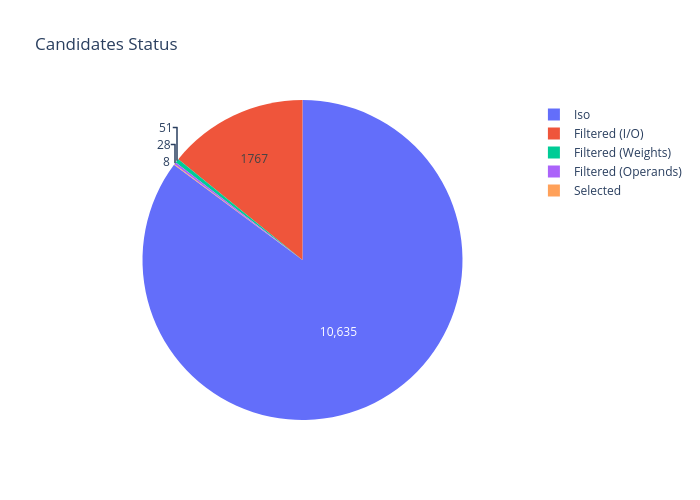

,Unnamed: 0,Label,Count
0,0,Original,12489


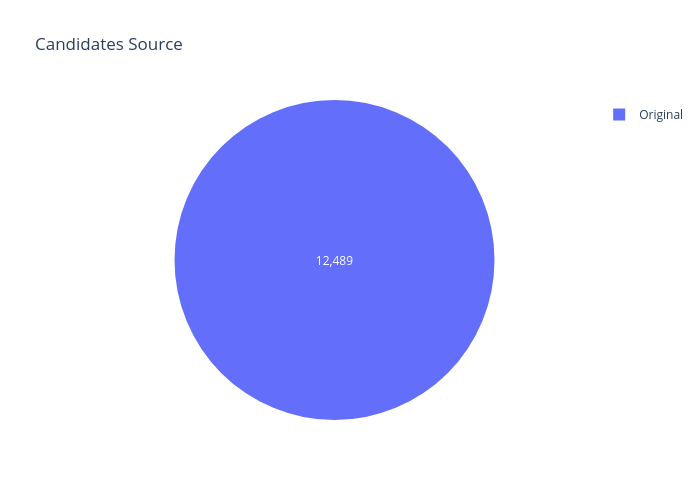

,Name,Secs,Secs (rel.)
0,Settings Validation,0.000092,1.847940e-06
1,Connect to DB,0.000167,3.354450e-06
2,Query func from DB,0.004979,1.001768e-04
3,Query candidates from DB,0.003859,7.764165e-05
4,Conversion to NX (func),0.449429,9.042038e-03
5,Conversion to NX (candidates),12.040693,2.422460e-01
6,Subgraph Generation,1.248593,2.512037e-02
7,Relabeling,2.209141,4.444558e-02
8,Dumping GF graph,0.020885,4.201918e-04
9,I/O Analysis,10.159976,2.044079e-01


,Unnamed: 0,Label,Count
0,0,Iso,208
1,1,Filtered (I/O),41
2,2,Selected,12
3,3,Filtered (Operands),9
4,4,Filtered (Mem),6


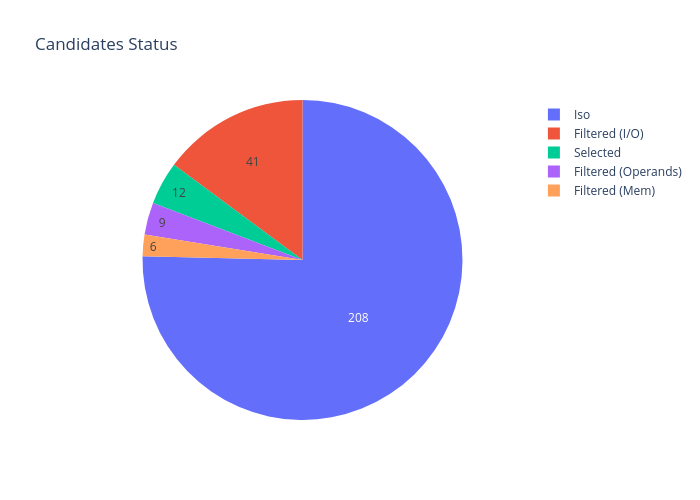

,Unnamed: 0,Label,Count
0,0,Original,276


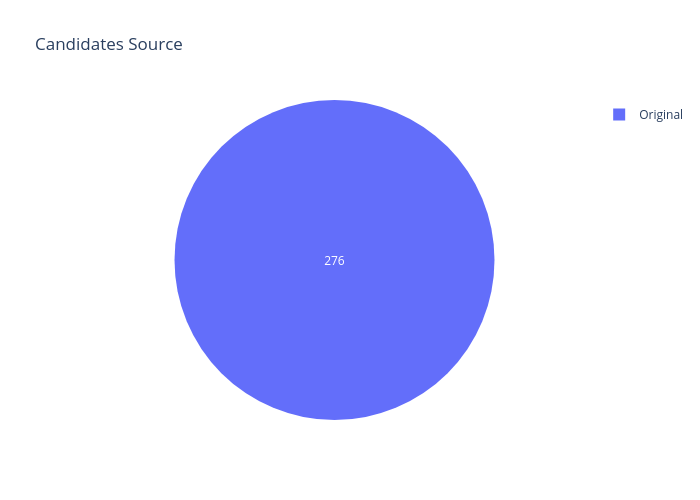

,Name,Secs,Secs (rel.)
0,Settings Validation,0.000085,0.000017
1,Connect to DB,0.000192,0.000038
2,Query func from DB,0.005071,0.001004
3,Query candidates from DB,0.003504,0.000694
4,Conversion to NX (func),0.436860,0.086489
5,Conversion to NX (candidates),0.229579,0.045452
6,Subgraph Generation,0.008021,0.001588
7,Relabeling,0.034321,0.006795
8,Dumping GF graph,0.049476,0.009795
9,I/O Analysis,0.199369,0.039471


,Unnamed: 0,Label,Count
0,0,Filtered (I/O),1


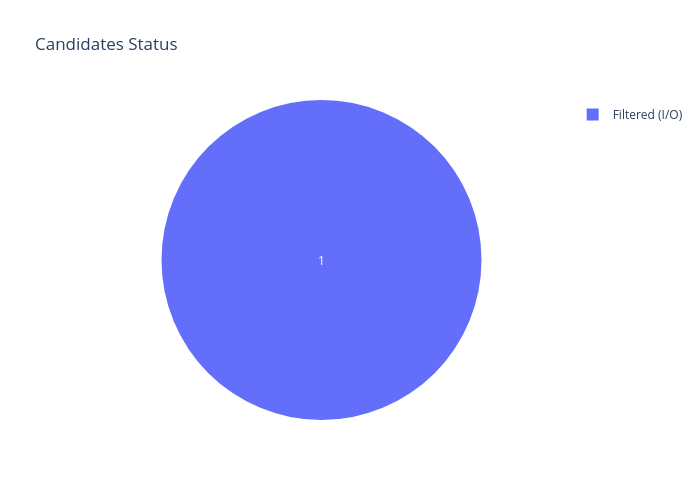

,Unnamed: 0,Label,Count
0,0,Original,1


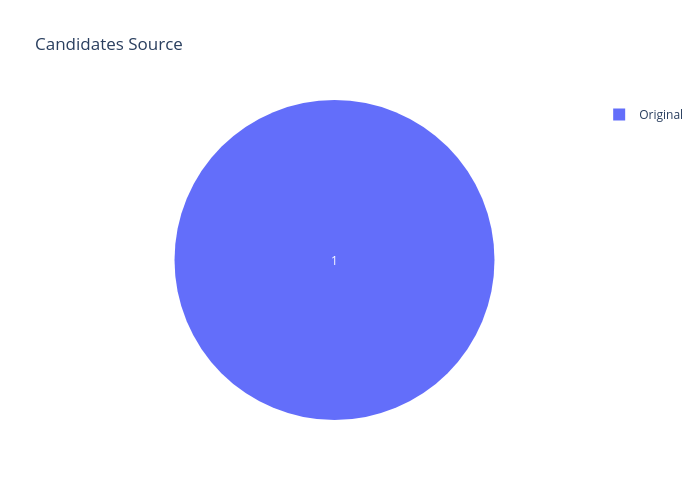

,Name,Secs,Secs (rel.)
0,Settings Validation,0.000085,0.000050
1,Connect to DB,0.000165,0.000096
2,Query func from DB,0.005259,0.003074
3,Query candidates from DB,0.008363,0.004888
4,Conversion to NX (func),0.427858,0.250056
5,Conversion to NX (candidates),0.002380,0.001391
6,Subgraph Generation,0.007548,0.004411
7,Relabeling,0.015178,0.008871
8,Dumping GF graph,0.069593,0.040673
9,I/O Analysis,0.001237,0.000723


In [14]:
for _, row_data in choices_df.iterrows():
    func_name = row_data["func_name"]
    bb_name = row_data["bb_name"]
    func_bb_dir = WORK / f"{func_name}_{bb_name}_0"  # TODO: chekc suffix?
    times_csv = func_bb_dir / "times.csv"
    pie_csv = func_bb_dir / "pie.csv"
    pie2_csv = func_bb_dir / "pie2.csv"
    pie_img = func_bb_dir / "pie.png"
    pie2_img = func_bb_dir / "pie2.png"
    display(HTML(f"<h2>Func: {func_name}, BB: {bb_name}</h2>"))
    display(pd.read_csv(pie_csv))
    display(Image(pie_img))
    display(pd.read_csv(pie2_csv))
    display(Image(pie2_img))
    display(pd.read_csv(times_csv, index_col=False))

In [15]:
gen_dir = WORK / "gen"
for file in gen_dir.glob("*.flat"):
    display(HTML(f"<h3>File: {file.name}</h2>"))
    with open(file, "r") as f:
        code = f.read()
    display(Markdown(f"```c\n{code}\n```"""))

```c
// DateTime: 20241113T001717, Sub: 14, Name: name14, Inputs: 1, Outputs: 1
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(SRLI((unsigned<32>)(SLLI(rs1_val,(20))),(25)));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001717, Sub: 15, Name: name15, Inputs: 2, Outputs: 1
unsigned<32> rs2_val=X[rs2];
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(MUL((unsigned<32>)(SRLI(rs2_val,(28))),rs1_val));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001639, Sub: 18, Name: name18, Inputs: 2, Outputs: 1
unsigned<32> rs1_val=X[rs1];
unsigned<32> rs2_val=X[rs2];
unsigned<32> outp0=(unsigned<32>)(AND((unsigned<32>)(SRAI(rs2_val,(31))),rs1_val));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001717, Sub: 2, Name: name2, Inputs: 1, Outputs: 1
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(MUL((unsigned<32>)(SRLI((unsigned<32>)(SLLI(rs1_val,(26))),(28))),(unsigned<32>)(SRLI((unsigned<32>)(SLLI(rs1_val,(20))),(25)))));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001717, Sub: 8, Name: name8, Inputs: 2, Outputs: 1
unsigned<32> rs2_val=X[rs2];
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(MUL((unsigned<32>)(SRLI((unsigned<32>)(SLLI(rs2_val,(26))),(28))),rs1_val));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001717, Sub: 4, Name: name4, Inputs: 2, Outputs: 1
unsigned<32> rs2_val=X[rs2];
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(MUL((unsigned<32>)(SRLI(rs1_val,(28))),(unsigned<32>)(SRLI((unsigned<32>)(SLLI(rs2_val,(20))),(25)))));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001717, Sub: 13, Name: name13, Inputs: 2, Outputs: 1
unsigned<32> rs2_val=X[rs2];
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(MUL(rs1_val,(unsigned<32>)(SRLI(rs2_val,(25)))));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001639, Sub: 10, Name: name10, Inputs: 1, Outputs: 1
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(SRAI((unsigned<32>)(SLLI(rs1_val,(31))),(31)));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001717, Sub: 0, Name: name0, Inputs: 2, Outputs: 1
unsigned<32> rs1_val=X[rs1];
unsigned<32> rs2_val=X[rs2];
unsigned<32> temp0=(unsigned<32>)(MUL(rs2_val,rs1_val));
unsigned<32> outp0=(unsigned<32>)(MUL((unsigned<32>)(SRLI((unsigned<32>)(SLLI(temp0,(26))),(28))),(unsigned<32>)(SRLI((unsigned<32>)(SLLI(temp0,(20))),(25)))));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001717, Sub: 16, Name: name16, Inputs: 1, Outputs: 1
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(SRLI((unsigned<32>)(SLLI(rs1_val,(26))),(28)));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001639, Sub: 19, Name: name19, Inputs: 2, Outputs: 1
unsigned<32> rs2_val=X[rs2];
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(AND((unsigned<32>)(SRAI(rs1_val,(31))),rs2_val));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001639, Sub: 17, Name: name17, Inputs: 2, Outputs: 1
unsigned<32> rs2_val=X[rs2];
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(AND((unsigned<32>)(SRAI((unsigned<32>)(SLLI(rs1_val,(31))),(31))),rs2_val));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001717, Sub: 9, Name: name9, Inputs: 2, Outputs: 1
unsigned<32> rs1_val=X[rs1];
unsigned<32> rs2_val=X[rs2];
unsigned<32> outp0=(unsigned<32>)(MUL((unsigned<32>)(SRLI(rs1_val,(28))),(unsigned<32>)(SRLI(rs2_val,(25)))));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001639, Sub: 6, Name: name6, Inputs: 1, Outputs: 1
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(SRLI((unsigned<32>)(SLLI(rs1_val,(16))),(17)));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001717, Sub: 5, Name: name5, Inputs: 2, Outputs: 1
unsigned<32> rs1_val=X[rs1];
unsigned<32> rs2_val=X[rs2];
unsigned<32> outp0=(unsigned<32>)(MUL((unsigned<32>)(SRLI((unsigned<32>)(SLLI(rs1_val,(26))),(28))),(unsigned<32>)(SRLI(rs2_val,(25)))));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001639, Sub: 12, Name: name12, Inputs: 2, Outputs: 1
unsigned<32> rs1_val=X[rs1];
unsigned<32> rs2_val=X[rs2];
unsigned<32> outp0=(unsigned<32>)(AND((unsigned<32>)(SRAI((unsigned<32>)(SLLI(rs2_val,(31))),(31))),rs1_val));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001639, Sub: 3, Name: name3, Inputs: 2, Outputs: 1
unsigned<32> rs1_val=X[rs1];
unsigned<32> rs2_val=X[rs2];
unsigned<32> outp0=(unsigned<32>)(SRAI((unsigned<32>)(SLLI((unsigned<32>)(XOR(rs1_val,rs2_val)),(31))),(31)));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001717, Sub: 1, Name: name1, Inputs: 2, Outputs: 1
unsigned<32> rs2_val=X[rs2];
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(ADD((unsigned<32>)(MUL((unsigned<32>)(SRLI((unsigned<32>)(SLLI(rs1_val,(26))),(28))),(unsigned<32>)(SRLI((unsigned<32>)(SLLI(rs1_val,(20))),(25))))),rs2_val));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001717, Sub: 7, Name: name7, Inputs: 2, Outputs: 1
unsigned<32> rs2_val=X[rs2];
unsigned<32> rs1_val=X[rs1];
unsigned<32> outp0=(unsigned<32>)(MUL(rs1_val,(unsigned<32>)(SRLI((unsigned<32>)(SLLI(rs2_val,(20))),(25)))));
X[rd]=outp0;
```

```c
// DateTime: 20241113T001639, Sub: 11, Name: name11, Inputs: 2, Outputs: 1
unsigned<32> rs1_val=X[rs1];
unsigned<32> rs2_val=X[rs2];
unsigned<32> outp0=(unsigned<32>)(SLLI((unsigned<32>)(XOR(rs1_val,rs2_val)),(31)));
X[rd]=outp0;
```

In [16]:
# TODO: venn

## CoreDSL Set

In [17]:
set_file = WORK / "XIsaac.core_desc"

with open(set_file, "r") as f:
    code = f.read()

display(Markdown(f"```c\n{code}\n```"""))

```c
import "/work/git/isaac-demo/etiss_arch_riscv/rv_base/RVI.core_desc"


InstructionSet XIsaac extends RV32I {
    instructions {
        CUSTOM0 {
            encoding: 7'b0000000 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom0", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> temp0 = (unsigned<32>)((((signed<32>)(rs2_val) * (signed<32>)(rs1_val))));
                unsigned<32> outp0 = (unsigned<32>)((((signed<32>)((unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(temp0) << (unsigned<32>)((26)))))) >> (unsigned<32>)((28)))))) * (signed<32>)((unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(temp0) << (unsigned<32>)((20)))))) >> (unsigned<32>)((25)))))))));
                X[rd] = outp0;
            }
        }
        CUSTOM1 {
            encoding: 7'b0000001 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom1", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((signed<32>)((unsigned<32>)((((signed<32>)((unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) << (unsigned<32>)((26)))))) >> (unsigned<32>)((28)))))) * (signed<32>)((unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) << (unsigned<32>)((20)))))) >> (unsigned<32>)((25)))))))))) + (signed<32>)(rs2_val))));
                X[rd] = outp0;
            }
        }
        CUSTOM2 {
            encoding: 7'b0000010 :: 5'b00000 :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom2", "{name(rd)}, {name(rs1)}"};
            behavior: {
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((signed<32>)((unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) << (unsigned<32>)((26)))))) >> (unsigned<32>)((28)))))) * (signed<32>)((unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) << (unsigned<32>)((20)))))) >> (unsigned<32>)((25)))))))));
                X[rd] = outp0;
            }
        }
        CUSTOM3 {
            encoding: 7'b0000011 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom3", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> outp0 = (unsigned<32>)((((signed<32>)((unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) ^ (unsigned<32>)(rs2_val))))) << (unsigned<32>)((31)))))) >> (signed<32>)((31)))));
                X[rd] = outp0;
            }
        }
        CUSTOM4 {
            encoding: 7'b0000100 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom4", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((signed<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) >> (unsigned<32>)((28)))))) * (signed<32>)((unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs2_val) << (unsigned<32>)((20)))))) >> (unsigned<32>)((25)))))))));
                X[rd] = outp0;
            }
        }
        CUSTOM5 {
            encoding: 7'b0000101 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom5", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> outp0 = (unsigned<32>)((((signed<32>)((unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) << (unsigned<32>)((26)))))) >> (unsigned<32>)((28)))))) * (signed<32>)((unsigned<32>)((((unsigned<32>)(rs2_val) >> (unsigned<32>)((25)))))))));
                X[rd] = outp0;
            }
        }
        CUSTOM6 {
            encoding: 7'b0000110 :: 5'b00000 :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom6", "{name(rd)}, {name(rs1)}"};
            behavior: {
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) << (unsigned<32>)((16)))))) >> (unsigned<32>)((17)))));
                X[rd] = outp0;
            }
        }
        CUSTOM7 {
            encoding: 7'b0000111 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom7", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((signed<32>)(rs1_val) * (signed<32>)((unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs2_val) << (unsigned<32>)((20)))))) >> (unsigned<32>)((25)))))))));
                X[rd] = outp0;
            }
        }
        CUSTOM8 {
            encoding: 7'b0001000 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom8", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((signed<32>)((unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs2_val) << (unsigned<32>)((26)))))) >> (unsigned<32>)((28)))))) * (signed<32>)(rs1_val))));
                X[rd] = outp0;
            }
        }
        CUSTOM9 {
            encoding: 7'b0001001 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom9", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> outp0 = (unsigned<32>)((((signed<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) >> (unsigned<32>)((28)))))) * (signed<32>)((unsigned<32>)((((unsigned<32>)(rs2_val) >> (unsigned<32>)((25)))))))));
                X[rd] = outp0;
            }
        }
        CUSTOM10 {
            encoding: 7'b0001010 :: 5'b00000 :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom10", "{name(rd)}, {name(rs1)}"};
            behavior: {
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((signed<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) << (unsigned<32>)((31)))))) >> (signed<32>)((31)))));
                X[rd] = outp0;
            }
        }
        CUSTOM11 {
            encoding: 7'b0001011 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom11", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> outp0 = (unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) ^ (unsigned<32>)(rs2_val))))) << (unsigned<32>)((31)))));
                X[rd] = outp0;
            }
        }
        CUSTOM12 {
            encoding: 7'b0001100 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom12", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> outp0 = (unsigned<32>)((((unsigned<32>)((unsigned<32>)((((signed<32>)((unsigned<32>)((((unsigned<32>)(rs2_val) << (unsigned<32>)((31)))))) >> (signed<32>)((31)))))) & (unsigned<32>)(rs1_val))));
                X[rd] = outp0;
            }
        }
        CUSTOM13 {
            encoding: 7'b0001101 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom13", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((signed<32>)(rs1_val) * (signed<32>)((unsigned<32>)((((unsigned<32>)(rs2_val) >> (unsigned<32>)((25)))))))));
                X[rd] = outp0;
            }
        }
        CUSTOM14 {
            encoding: 7'b0001110 :: 5'b00000 :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom14", "{name(rd)}, {name(rs1)}"};
            behavior: {
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) << (unsigned<32>)((20)))))) >> (unsigned<32>)((25)))));
                X[rd] = outp0;
            }
        }
        CUSTOM15 {
            encoding: 7'b0001111 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom15", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((signed<32>)((unsigned<32>)((((unsigned<32>)(rs2_val) >> (unsigned<32>)((28)))))) * (signed<32>)(rs1_val))));
                X[rd] = outp0;
            }
        }
        CUSTOM16 {
            encoding: 7'b0010000 :: 5'b00000 :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom16", "{name(rd)}, {name(rs1)}"};
            behavior: {
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((unsigned<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) << (unsigned<32>)((26)))))) >> (unsigned<32>)((28)))));
                X[rd] = outp0;
            }
        }
        CUSTOM17 {
            encoding: 7'b0010001 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom17", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((unsigned<32>)((unsigned<32>)((((signed<32>)((unsigned<32>)((((unsigned<32>)(rs1_val) << (unsigned<32>)((31)))))) >> (signed<32>)((31)))))) & (unsigned<32>)(rs2_val))));
                X[rd] = outp0;
            }
        }
        CUSTOM18 {
            encoding: 7'b0010010 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom18", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> outp0 = (unsigned<32>)((((unsigned<32>)((unsigned<32>)((((signed<32>)(rs2_val) >> (signed<32>)((31)))))) & (unsigned<32>)(rs1_val))));
                X[rd] = outp0;
            }
        }
        CUSTOM19 {
            encoding: 7'b0010011 :: rs2[4:0] :: rs1[4:0] :: 3'b000 :: rd[4:0] :: 7'b1111011;
            assembly: {"custom19", "{name(rd)}, {name(rs1)}, {name(rs2)}"};
            behavior: {
                unsigned<32> rs2_val = X[rs2];
                unsigned<32> rs1_val = X[rs1];
                unsigned<32> outp0 = (unsigned<32>)((((unsigned<32>)((unsigned<32>)((((signed<32>)(rs1_val) >> (signed<32>)((31)))))) & (unsigned<32>)(rs2_val))));
                X[rd] = outp0;
            }
        }
    }
}

```

## Seal5 Reports

In [52]:
reports_dir = WORK / "docker" / "seal5_reports"

### Properties

In [53]:
properties_csv = reports_dir / "properties.csv"
pd.read_csv(properties_csv)

,model,set,xlen,is_rv32,is_rv64,instr,enc_size,is_compressed,enc_format,opcode,...,is_siso,is_simo,has_imm_leaf,has_side_effects,may_load,may_store,is_terminator,is_branch,uses_custom_reg,defs_custom_reg
0,XIsaac,XIsaac,32,True,False,CUSTOM0,32,False,r-type (binop),custom-3,...,False,False,False,False,False,False,False,False,False,False
1,XIsaac,XIsaac,32,True,False,CUSTOM1,32,False,r-type (binop),custom-3,...,False,False,False,False,False,False,False,False,False,False
2,XIsaac,XIsaac,32,True,False,CUSTOM2,32,False,r-type (unop),custom-3,...,True,False,False,False,False,False,False,False,False,False
3,XIsaac,XIsaac,32,True,False,CUSTOM3,32,False,r-type (binop),custom-3,...,False,False,False,False,False,False,False,False,False,False
4,XIsaac,XIsaac,32,True,False,CUSTOM4,32,False,r-type (binop),custom-3,...,False,False,False,False,False,False,False,False,False,False
5,XIsaac,XIsaac,32,True,False,CUSTOM5,32,False,r-type (binop),custom-3,...,False,False,False,False,False,False,False,False,False,False
6,XIsaac,XIsaac,32,True,False,CUSTOM6,32,False,r-type (unop),custom-3,...,True,False,False,False,False,False,False,False,False,False
7,XIsaac,XIsaac,32,True,False,CUSTOM7,32,False,r-type (binop),custom-3,...,False,False,False,False,False,False,False,False,False,False
8,XIsaac,XIsaac,32,True,False,CUSTOM8,32,False,r-type (binop),custom-3,...,False,False,False,False,False,False,False,False,False,False
9,XIsaac,XIsaac,32,True,False,CUSTOM9,32,False,r-type (binop),custom-3,...,False,False,False,False,False,False,False,False,False,False


### Stage Times

In [54]:
stage_times_csv = reports_dir / "stage_times.csv"
pd.read_csv(stage_times_csv)[["stage", "time_s"]].dropna()

,stage,time_s
0,setup,38.220041
1,patch,22.587802
2,build,1055.784149
3,transform,1.488924
4,generate,1.442818
5,patch,11.284966
6,build,60.620480
7,build,7.580063
8,build,7.392624
9,generate,2.842686


### Passes

In [55]:
status_compact_csv = reports_dir / "status_compact.csv"
pd.read_csv(status_compact_csv)

,model,set,xlen,instr,n_success,n_skipped,n_failed,n_total,status
0,XIsaac,XIsaac,32,CUSTOM0,12,0,0,12,good
1,XIsaac,XIsaac,32,CUSTOM1,12,0,0,12,good
2,XIsaac,XIsaac,32,CUSTOM2,12,0,0,12,good
3,XIsaac,XIsaac,32,CUSTOM3,12,0,0,12,good
4,XIsaac,XIsaac,32,CUSTOM4,12,0,0,12,good
5,XIsaac,XIsaac,32,CUSTOM5,12,0,0,12,good
6,XIsaac,XIsaac,32,CUSTOM6,12,0,0,12,good
7,XIsaac,XIsaac,32,CUSTOM7,12,0,0,12,good
8,XIsaac,XIsaac,32,CUSTOM8,12,0,0,12,good
9,XIsaac,XIsaac,32,CUSTOM9,12,0,0,12,good


### Test Results/Coverage

In [56]:
# test_coverage_compact_csv = reports_dir / "test_coverage_compact.csv"
# pd.read_csv(test_coverage_compact_csv)

In [57]:
# test_results_compact_csv = reports_dir / "test_results_compact.csv"
# pd.read_csv(test_results_compact_csv)

### Changed Files/Lines

In [58]:
diff_csv = reports_dir / "diff.csv"
pd.read_csv(diff_csv)

,phase,n_files_changed,n_insertions,n_deletions
0,PHASE_0,29,4402,5
1,PHASE_1,3,15,0
2,PHASE_2,22,877,0
3,PHASE_3,0,0,0
4,PHASE_4,21,220,0
5,PHASE_5,0,0,0
6,*,71,5514,5


## ISS Evaluation

In [65]:
RUN_COMPARE = Path(str(RUN) + "_compare")
REPORT_COMPARE = RUN_COMPARE / "report.csv"

COLS = ["Model", "Arch", "Run Instructions", "Total ROM", "Total RAM"]
pd.read_csv(REPORT_COMPARE)[COLS]

,Model,Arch,Run Instructions,Total ROM,Total RAM
0,coremark,NaN,3562297,52848,4796
1,coremark,rv32imfd_xisaac,3334737,52720,4796


## HLS Metrics

In [30]:
hls_metrics_csv = "work/docker/hls/metrics5.csv"  # TODO!
display(pd.read_csv(hls_metrics_csv))

,instruction,mask,tags,schedule,latency
0,CUSTOM0,0000000----------000-----1111011,"['RdStallFlush-Is-Per-ISAX', 'ReadResults-Are-...","[{'interface': 'RdRS1', 'stage': 2}, {'interfa...",3.0
1,CUSTOM1,000000100000-----000-----1111011,"['RdStallFlush-Is-Per-ISAX', 'ReadResults-Are-...","[{'interface': 'RdRS1', 'stage': 2}, {'interfa...",3.0
2,CUSTOM2,0000010----------000-----1111011,"['RdStallFlush-Is-Per-ISAX', 'ReadResults-Are-...","[{'interface': 'RdRS1', 'stage': 2}, {'interfa...",3.0
3,CUSTOM3,000001100000-----000-----1111011,"['RdStallFlush-Is-Per-ISAX', 'ReadResults-Are-...","[{'interface': 'RdRS1', 'stage': 2}, {'interfa...",3.0
4,CUSTOM4,0000100----------000-----1111011,"['RdStallFlush-Is-Per-ISAX', 'ReadResults-Are-...","[{'interface': 'RdRS1', 'stage': 2}, {'interfa...",3.0
5,CUSTOM5,0000101----------000-----1111011,"['RdStallFlush-Is-Per-ISAX', 'ReadResults-Are-...","[{'interface': 'RdRS1', 'stage': 2}, {'interfa...",3.0
6,CUSTOM6,0000110----------000-----1111011,"['RdStallFlush-Is-Per-ISAX', 'ReadResults-Are-...","[{'interface': 'RdRS1', 'stage': 2}, {'interfa...",3.0
7,CUSTOM7,0000111----------000-----1111011,"['RdStallFlush-Is-Per-ISAX', 'ReadResults-Are-...","[{'interface': 'RdRS1', 'stage': 2}, {'interfa...",3.0
8,CUSTOM8,0001000----------000-----1111011,"['RdStallFlush-Is-Per-ISAX', 'ReadResults-Are-...","[{'interface': 'RdRS1', 'stage': 2}, {'interfa...",3.0
9,CUSTOM9,000100100000-----000-----1111011,"['RdStallFlush-Is-Per-ISAX', 'ReadResults-Are-...","[{'interface': 'RdRS1', 'stage': 2}, {'interfa...",3.0


## HW Synthesis Metrics

In [28]:
syn_metrics_csv = "work/docker/hls/syn_metrics5.csv"  # TODO!
display(pd.read_csv(syn_metrics_csv))
# TODO: store baseline (without ext)!

,Project,Clock Period [s],Clock Period [ns],Clock Freq [Hz],Clock Freq [MHz],Instance Count,Instance Area,Internal Power,Switching Power,Leakage Power,Total Power,IOs,Die Area,Core Area,Instance Utilization,Est. Wire Length
0,prj,4.761905e-08,47.619048,21000000.0,21.0,22957,182818,0.010383,0.014607,2.105698e-07,0.024991,308,353604,333425,0.548303,711221
